In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/500-person-gender-height-weight-bodymassindex/500_Person_Gender_Height_Weight_Index.csv


# Loading the data

In [2]:
data = pd.read_csv('/kaggle/input/500-person-gender-height-weight-bodymassindex/500_Person_Gender_Height_Weight_Index.csv')

# Exploratory Data Analysis

In [3]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [4]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [6]:
# importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

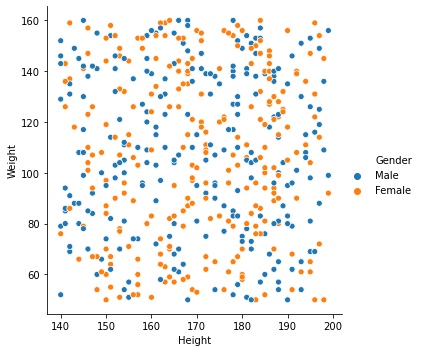

In [7]:
sns.relplot(x='Height',y='Weight',data=data,hue='Gender')

# Preprocessing

In [8]:
data = pd.get_dummies(data)


In [9]:
data.drop('Gender_Male',axis=1, inplace=True)
data.head()

,Height,Weight,Index,Gender_Female
0,174,96,4,0
1,189,87,2,0
2,185,110,4,1
3,195,104,3,1
4,149,61,3,0


# Model Building

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [11]:
X =data.drop('Index',axis=1)
y = data['Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
model = LogisticRegression()
model.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [13]:
y_pred = model.predict(X_test)

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.57      0.73         7
           2       0.50      1.00      0.67         8
           3       0.56      0.31      0.40        16
           4       0.62      0.58      0.60        26
           5       0.84      0.90      0.87        40

    accuracy                           0.71       100
   macro avg       0.71      0.73      0.69       100
weighted avg       0.72      0.71      0.70       100



In [15]:
print(confusion_matrix(y_test,y_pred))

[[ 3  0  0  0  0  0]
 [ 1  4  2  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  6  5  5  0]
 [ 0  0  0  4 15  7]
 [ 0  0  0  0  4 36]]


In [16]:
print(accuracy_score(y_test,y_pred))

0.71
